In [16]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Load the dataset
data = pd.read_csv("insurance.csv") 

# Check the Missing Value Count
print("How many values are missing?")
print(data.isnull().sum())

# Handling Missing Values

# Option 1: Drop the entire column with missing values
data_option1 = data.copy()
data_option1.drop('bmi', axis=1, inplace=True)
print("\nOption 1: Drop the 'bmi' column")
print(data_option1.isnull().sum())

# Option 2: Drop rows with missing values
data_option2 = data.copy()
data_option2.dropna(inplace=True)
data_option2.reset_index(drop=True, inplace=True)
print("\nOption 2: Drop rows with missing values")
print(data_option2.isnull().sum())

# Option 3: Fill missing values with mean (SimpleImputer)
data_option3 = data.copy()
imputer = SimpleImputer(strategy="mean")
data_option3["bmi"] = imputer.fit_transform(data_option3[["bmi"]])
print("\nOption 3: Fill missing values with mean (SimpleImputer)")
print(data_option3.isnull().sum())

How many values are missing?
age         0
sex         0
bmi         5
children    0
smoker      0
region      0
charges     0
dtype: int64

Option 1: Drop the 'bmi' column
age         0
sex         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Option 2: Drop rows with missing values
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Option 3: Fill missing values with mean (SimpleImputer)
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


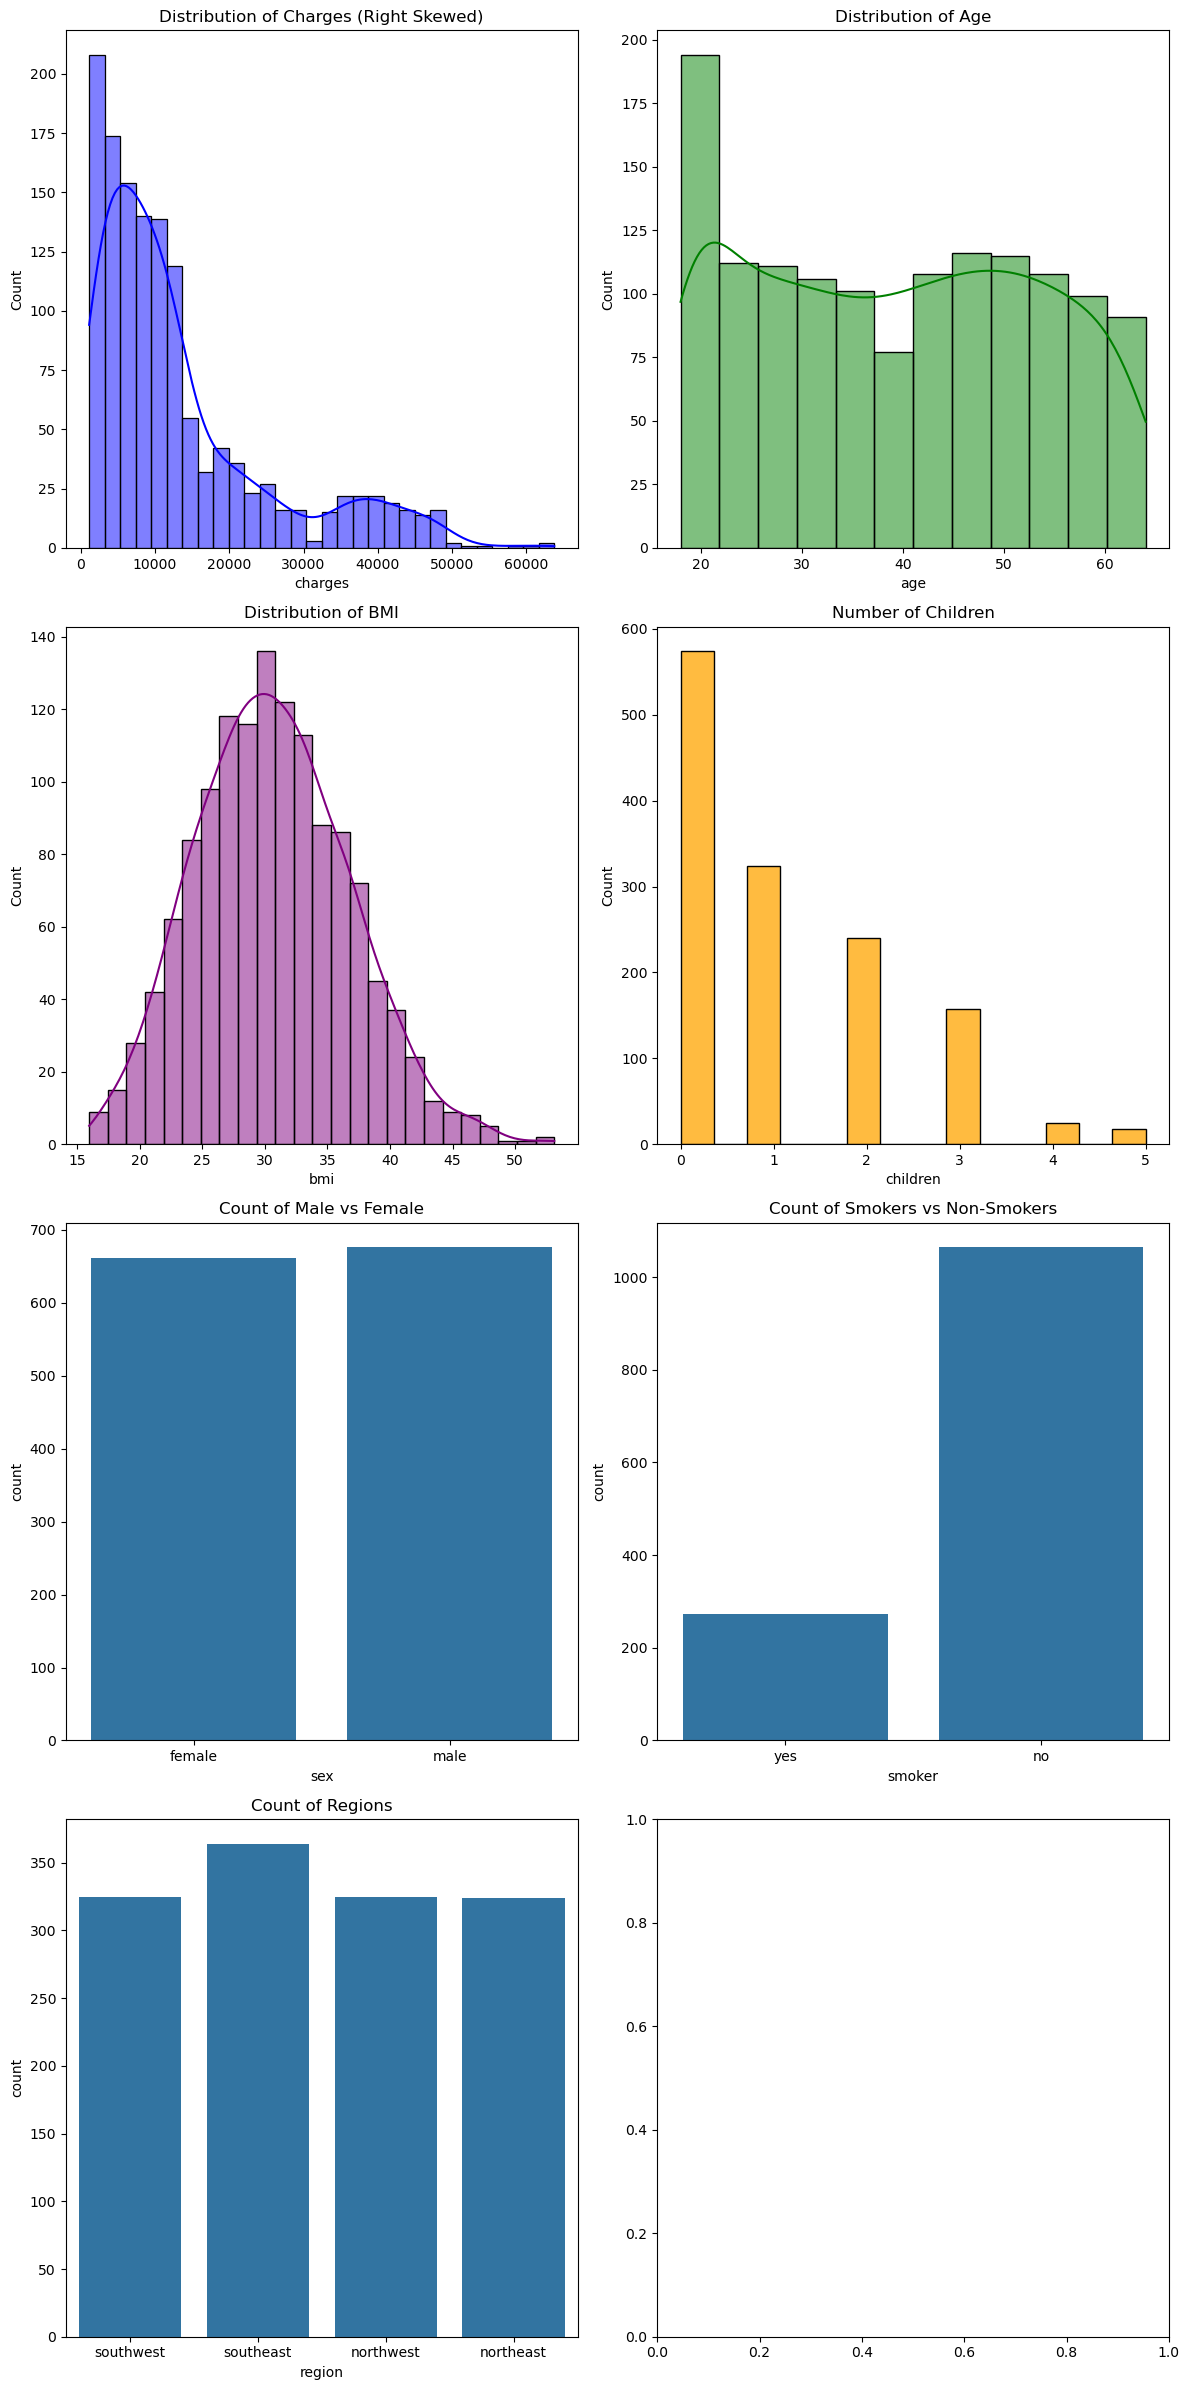

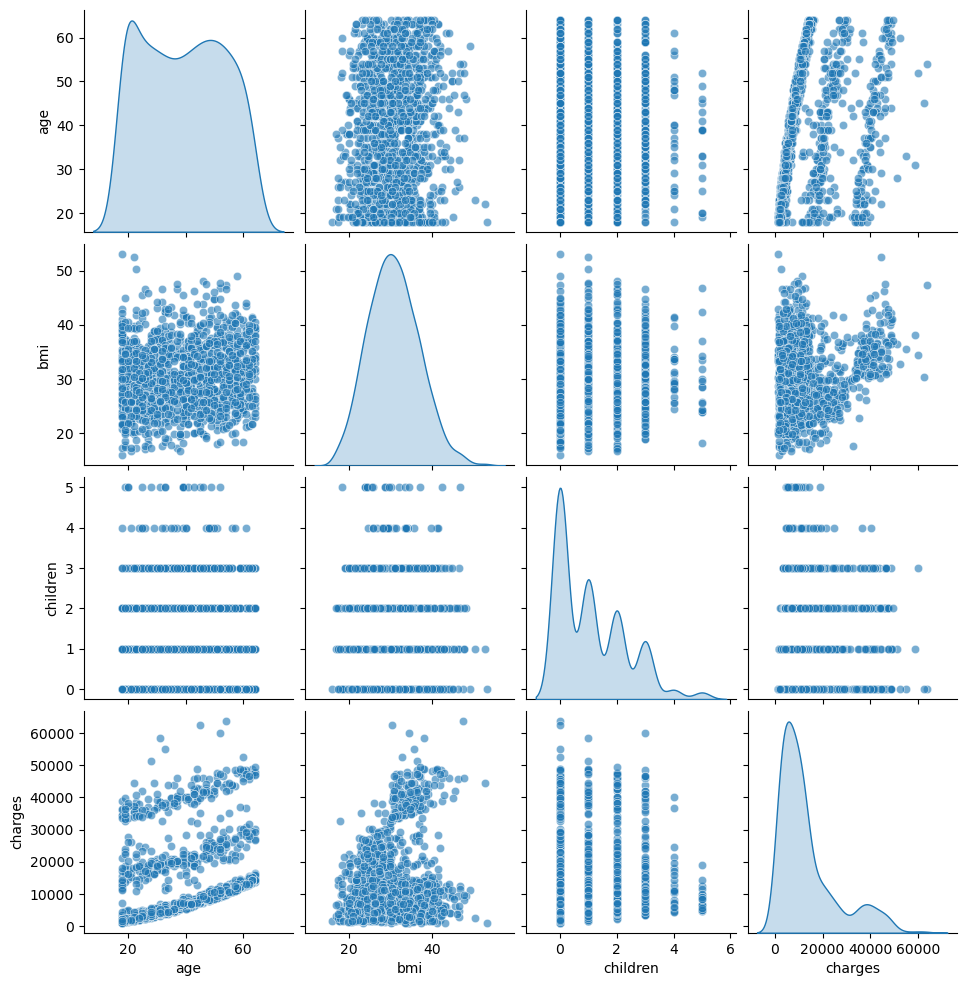

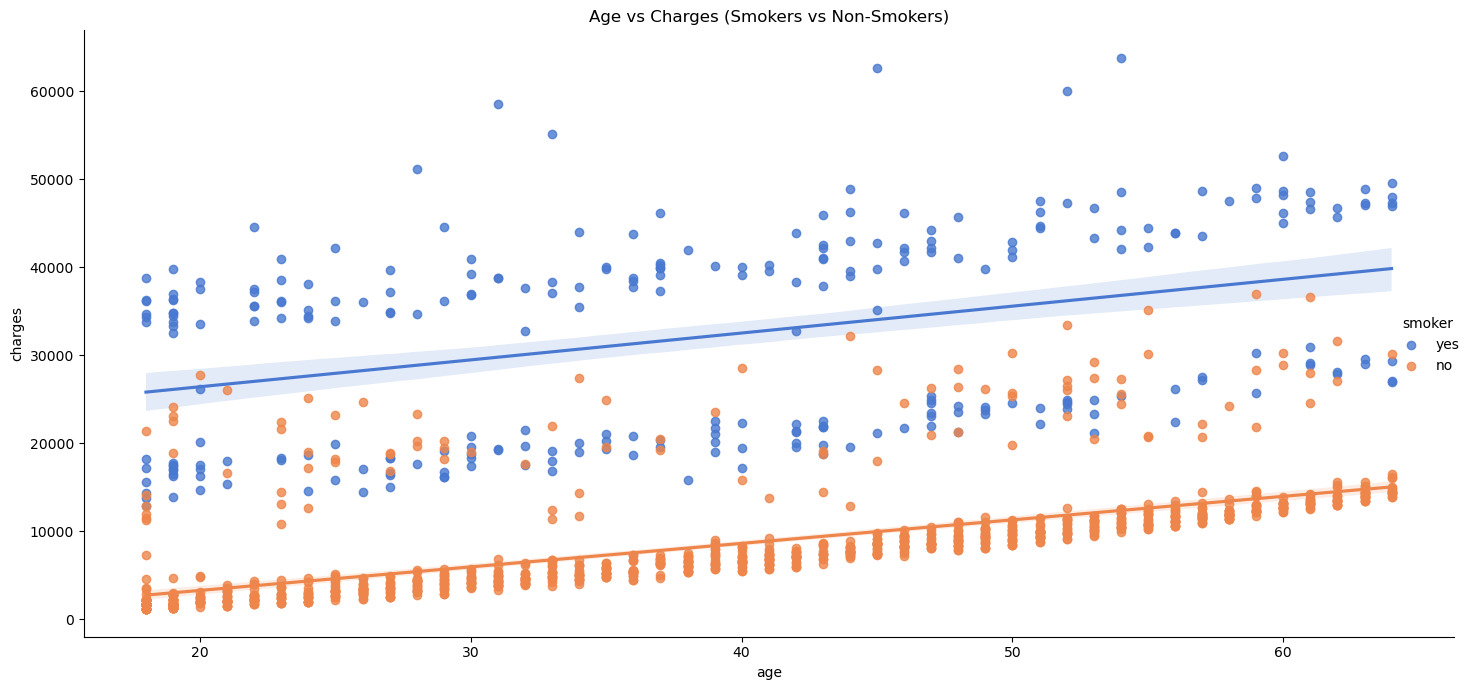

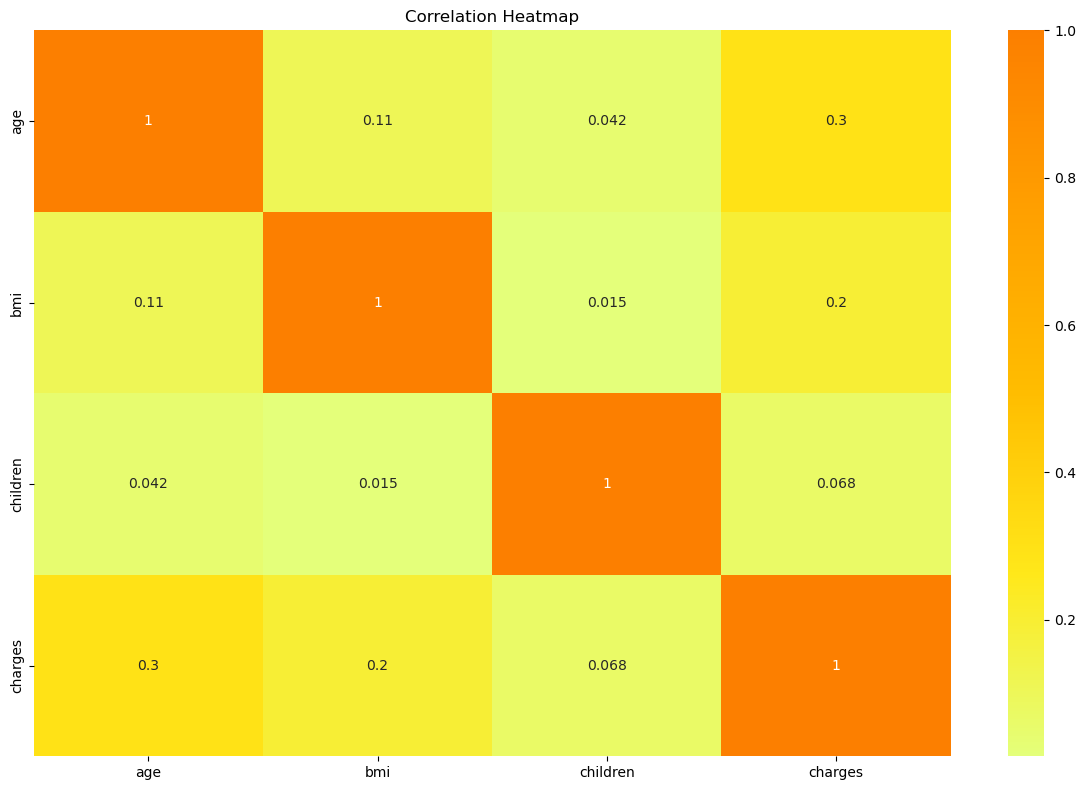

In [28]:
# Visualization

# Create subplots to analyze distributions
fig, ax = plt.subplots(4, 2, figsize=(12, 24))

# Distribution of numerical columns
sns.histplot(data['charges'], kde=True, ax=ax[0, 0], color="blue")
ax[0, 0].set_title("Distribution of Charges (Right Skewed)")

sns.histplot(data['age'], kde=True, ax=ax[0, 1], color="green")
ax[0, 1].set_title("Distribution of Age")

sns.histplot(data['bmi'], kde=True, ax=ax[1, 0], color="purple")
ax[1, 0].set_title("Distribution of BMI")

sns.histplot(data['children'], kde=False, ax=ax[1, 1], color="orange")
ax[1, 1].set_title("Number of Children")

# Count plots for categorical columns
sns.countplot(x=data['sex'], ax=ax[2, 0])
ax[2, 0].set_title("Count of Male vs Female")

sns.countplot(x=data['smoker'], ax=ax[2, 1])
ax[2, 1].set_title("Count of Smokers vs Non-Smokers")

sns.countplot(x=data['region'], ax=ax[3, 0])
ax[3, 0].set_title("Count of Regions")

# Add spacing between plots and display
plt.tight_layout()
plt.show()

# Visualizing Skewness with Pairplots
pair_grid = sns.pairplot(data, diag_kind="kde", plot_kws={'alpha': 0.6})
plt.show()

# Scatterplot: Smokers vs Non-Smokers on Age vs Charges
lm = sns.lmplot(
    x="age",
    y="charges",
    hue="smoker",
    data=data,
    palette="muted",
    height=7,
    aspect=2
)
plt.title("Age vs Charges (Smokers vs Non-Smokers)")
plt.tight_layout()
plt.show()

# Correlation Heatmap
# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=[np.number])
corr = numeric_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap="Wistia", annot=True)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [42]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Load the dataset
data = pd.read_csv("insurance.csv")

# Display the first 15 rows of the dataset
print("First 15 rows of the dataset:")
print(data.head(15))

# Handling Missing Values
# Reload dataset to simulate a clean state after missing value handling
imputer = SimpleImputer(strategy="mean")
data["bmi"] = imputer.fit_transform(data[["bmi"]])
print("\nOption 3: Fill missing values with mean (SimpleImputer)")
print(data.isnull().sum())

# Label Encoding: Encode 'sex' and 'smoker' columns
le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])
print("\nSklearn Label Encoding for 'sex':")
print(dict(zip(le.classes_, le.transform(le.classes_))))
print(data[['sex']].head(10))

data['smoker'] = le.fit_transform(data['smoker'])
print("\nSklearn Label Encoding for 'smoker':")
print(dict(zip(le.classes_, le.transform(le.classes_))))
print(data[['smoker']].head(10))

# One Hot Encoding: Encode the 'region' column
ohe = OneHotEncoder(sparse_output=False, drop='first')  # Drop first to avoid multicollinearity
region_encoded = ohe.fit_transform(data[['region']])
region_columns = ohe.get_feature_names_out(['region'])

# Add one hot encoded columns back to the DataFrame
region_df = pd.DataFrame(region_encoded, columns=region_columns)
data = pd.concat([data.reset_index(drop=True), region_df.reset_index(drop=True)], axis=1)
data.drop(columns=['region'], inplace=True)

print("\nSklearn One Hot Encoding for 'region':")
print(region_df.head(10))

# Display the updated DataFrame
print("\nFinal DataFrame after encoding:")
print(data.head(15))

First 15 rows of the dataset:
    age     sex     bmi  children smoker     region      charges
0    19  female  27.900         0    yes  southwest  16884.92400
1    18    male  33.770         1     no  southeast   1725.55230
2    28    male  33.000         3     no  southeast   4449.46200
3    33    male  22.705         0     no  northwest  21984.47061
4    32    male  28.880         0     no  northwest   3866.85520
5    31  female  25.740         0     no  southeast   3756.62160
6    46  female  33.440         1     no  southeast   8240.58960
7    37  female  27.740         3     no  northwest   7281.50560
8    37    male  29.830         2     no  northeast   6406.41070
9    60  female  25.840         0     no  northwest  28923.13692
10   25    male  26.220         0     no  northeast   2721.32080
11   62  female  26.290         0    yes  southeast  27808.72510
12   23    male  34.400         0     no  southwest   1826.84300
13   56  female  39.820         0     no  southeast  11090.7

In [62]:
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv("insurance.csv")

# Display the first 15 rows of the dataset
print("First 15 rows of the dataset:")
print(data.head(15))

# Encoding Categorical Variables
# Label encode 'sex' and 'smoker'
le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])
data['smoker'] = le.fit_transform(data['smoker'])

# One hot encode 'region'
ohe = OneHotEncoder(sparse_output=False, drop='first')
region_encoded = ohe.fit_transform(data[['region']])
region_columns = ohe.get_feature_names_out(['region'])
region_df = pd.DataFrame(region_encoded, columns=region_columns)

# Combine numerical and encoded columns
X_num = data[['age', 'bmi', 'children']].copy()
X_final = pd.concat([X_num, region_df, data['sex'], data['smoker']], axis=1)

# Assign response variable
y_final = data[['charges']].copy()

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=0)

# Display shapes of the resulting datasets
print("\nShapes of train/test datasets:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

First 15 rows of the dataset:
    age     sex     bmi  children smoker     region      charges
0    19  female  27.900         0    yes  southwest  16884.92400
1    18    male  33.770         1     no  southeast   1725.55230
2    28    male  33.000         3     no  southeast   4449.46200
3    33    male  22.705         0     no  northwest  21984.47061
4    32    male  28.880         0     no  northwest   3866.85520
5    31  female  25.740         0     no  southeast   3756.62160
6    46  female  33.440         1     no  southeast   8240.58960
7    37  female  27.740         3     no  northwest   7281.50560
8    37    male  29.830         2     no  northeast   6406.41070
9    60  female  25.840         0     no  northwest  28923.13692
10   25    male  26.220         0     no  northeast   2721.32080
11   62  female  26.290         0    yes  southeast  27808.72510
12   23    male  34.400         0     no  southwest   1826.84300
13   56  female  39.820         0     no  southeast  11090.7

In [64]:
# Load the dataset
data = pd.read_csv("insurance.csv")

# Display the first 15 rows of the dataset
print("First 15 rows of the dataset:")
print(data.head(15))

# Normalize the training and test sets = (value - min)/(max - min)
n_scaler = MinMaxScaler()
X_train_normalized = n_scaler.fit_transform(X_train)
X_test_normalized = n_scaler.transform(X_test)
print("\nNormalized Training Data:\n", X_train_normalized[:5])
print("Normalized Test Data:\n", X_test_normalized[:5])

# Standardize the training and test sets = (value - mean)/SD
s_scaler = StandardScaler()
X_train_standardized = s_scaler.fit_transform(X_train)
X_test_standardized = s_scaler.transform(X_test)
print("\nStandardized Training Data:\n", X_train_standardized[:5])
print("Standardized Test Data:\n", X_test_standardized[:5])

First 15 rows of the dataset:
    age     sex     bmi  children smoker     region      charges
0    19  female  27.900         0    yes  southwest  16884.92400
1    18    male  33.770         1     no  southeast   1725.55230
2    28    male  33.000         3     no  southeast   4449.46200
3    33    male  22.705         0     no  northwest  21984.47061
4    32    male  28.880         0     no  northwest   3866.85520
5    31  female  25.740         0     no  southeast   3756.62160
6    46  female  33.440         1     no  southeast   8240.58960
7    37  female  27.740         3     no  northwest   7281.50560
8    37    male  29.830         2     no  northeast   6406.41070
9    60  female  25.840         0     no  northwest  28923.13692
10   25    male  26.220         0     no  northeast   2721.32080
11   62  female  26.290         0    yes  southeast  27808.72510
12   23    male  34.400         0     no  southwest   1826.84300
13   56  female  39.820         0     no  southeast  11090.7

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
data = pd.read_csv("insurance.csv")

# Fill missing values in the 'bmi' column with the mean
data['bmi'] = data['bmi'].fillna(data['bmi'].mean())

# Display the first 15 rows of the dataset
print("First 15 rows of the dataset:")
print(data.head(15))

# Encoding Categorical Variables
le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])  # Female=0, Male=1
data['smoker'] = le.fit_transform(data['smoker'])  # No=0, Yes=1
region_df = pd.get_dummies(data['region'], drop_first=True)  # One-hot encode 'region'

# Prepare the data
X_num = data[['age', 'bmi', 'children']].copy()  # Numerical features
X_final = pd.concat([X_num, region_df, data['sex'], data['smoker']], axis=1)  # Combine all features
y_final = data['charges']  # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_final, test_size=0.33, random_state=0
)

# Standardize the features
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float64))
X_test = s_scaler.transform(X_test.astype(np.float64))

# Fit the Linear Regression model on the training data
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on both training and test datasets
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Print the coefficients, intercept, and R-squared scores
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))
print(
    "lr train score %.3f, lr test score: %.3f"
    % (lr.score(X_train, y_train), lr.score(X_test, y_test))
)

First 15 rows of the dataset:
    age     sex        bmi  children smoker     region      charges
0    19  female  27.900000         0    yes  southwest  16884.92400
1    18    male  33.770000         1     no  southeast   1725.55230
2    28    male  33.000000         3     no  southeast   4449.46200
3    33    male  22.705000         0     no  northwest  21984.47061
4    32    male  28.880000         0     no  northwest   3866.85520
5    31  female  25.740000         0     no  southeast   3756.62160
6    46  female  33.440000         1     no  southeast   8240.58960
7    37  female  27.740000         3     no  northwest   7281.50560
8    37    male  29.830000         2     no  northeast   6406.41070
9    60  female  25.840000         0     no  northwest  28923.13692
10   25    male  26.220000         0     no  northeast   2721.32080
11   62  female  26.290000         0    yes  southeast  27808.72510
12   23    male  34.400000         0     no  southwest   1826.84300
13   56  female  3

In [76]:
from sklearn.preprocessing import PolynomialFeatures

# Load the dataset
data = pd.read_csv("insurance.csv")

# Fill missing values in the 'bmi' column with the mean
data['bmi'] = data['bmi'].fillna(data['bmi'].mean())

# Display the first 15 rows of the dataset
print("First 15 rows of the dataset:")
print(data.head(15))

# Encoding Categorical Variables
le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])  # e.g., Female=0, Male=1
data['smoker'] = le.fit_transform(data['smoker'])  # e.g., No=0, Yes=1
region_df = pd.get_dummies(data['region'], drop_first=True)  # One-hot encode 'region'

# Prepare the data
X_num = data[['age', 'bmi', 'children']].copy()  # Numerical features
X_final = pd.concat([X_num, region_df, data['sex'], data['smoker']], axis=1)  # Combine all features
y_final = data['charges']  # Target variable

# Create polynomial features (degree=2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_final)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_poly, y_final, test_size=0.33, random_state=0
)

# Standardize the polynomial features
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float64))
X_test = s_scaler.transform(X_test.astype(np.float64))

# Fit the polynomial regression model on the training data
poly_lr = LinearRegression()
poly_lr.fit(X_train, y_train)

# Predict on both training and test datasets
y_train_pred = poly_lr.predict(X_train)
y_test_pred = poly_lr.predict(X_test)

# Print final coefficients, intercept, and R-squared scores
print("Polynomial Regression (degree=2)")
print("Coefficients:", poly_lr.coef_)
print("Intercept:", poly_lr.intercept_)
print(
    "poly train score %.3f, poly test score: %.3f"
    % (poly_lr.score(X_train, y_train), poly_lr.score(X_test, y_test))
)

First 15 rows of the dataset:
    age     sex        bmi  children smoker     region      charges
0    19  female  27.900000         0    yes  southwest  16884.92400
1    18    male  33.770000         1     no  southeast   1725.55230
2    28    male  33.000000         3     no  southeast   4449.46200
3    33    male  22.705000         0     no  northwest  21984.47061
4    32    male  28.880000         0     no  northwest   3866.85520
5    31  female  25.740000         0     no  southeast   3756.62160
6    46  female  33.440000         1     no  southeast   8240.58960
7    37  female  27.740000         3     no  northwest   7281.50560
8    37    male  29.830000         2     no  northeast   6406.41070
9    60  female  25.840000         0     no  northwest  28923.13692
10   25    male  26.220000         0     no  northeast   2721.32080
11   62  female  26.290000         0    yes  southeast  27808.72510
12   23    male  34.400000         0     no  southwest   1826.84300
13   56  female  3

In [78]:
from sklearn.svm import SVR

# Load the dataset
data = pd.read_csv("insurance.csv")

# Fill missing values in the 'bmi' column with the mean
data['bmi'] = data['bmi'].fillna(data['bmi'].mean())

# Display the first 15 rows of the dataset
print("First 15 rows of the dataset:")
print(data.head(15))

# Encode categorical variables
le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])      # e.g., Female=0, Male=1
data['smoker'] = le.fit_transform(data['smoker'])# e.g., No=0, Yes=1
region_df = pd.get_dummies(data['region'], drop_first=True)

# Prepare the data
X_num = data[['age', 'bmi', 'children']]
X_final = pd.concat([X_num, region_df, data['sex'], data['smoker']], axis=1)
y_final = data['charges']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_final, test_size=0.33, random_state=0
)

# Standardize the features
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float64))
X_test = s_scaler.transform(X_test.astype(np.float64))

# Instantiate SVR
svr = SVR(kernel='linear', C=300)

# Fit the SVR model on the training data
svr.fit(X_train, y_train)

# Predict on both training and test datasets
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

# Print final scores
print("SVR (linear kernel, C=300)")
print("Train R-squared: %.3f" % svr.score(X_train, y_train))
print("Test R-squared:  %.3f" % svr.score(X_test, y_test))

First 15 rows of the dataset:
    age     sex        bmi  children smoker     region      charges
0    19  female  27.900000         0    yes  southwest  16884.92400
1    18    male  33.770000         1     no  southeast   1725.55230
2    28    male  33.000000         3     no  southeast   4449.46200
3    33    male  22.705000         0     no  northwest  21984.47061
4    32    male  28.880000         0     no  northwest   3866.85520
5    31  female  25.740000         0     no  southeast   3756.62160
6    46  female  33.440000         1     no  southeast   8240.58960
7    37  female  27.740000         3     no  northwest   7281.50560
8    37    male  29.830000         2     no  northeast   6406.41070
9    60  female  25.840000         0     no  northwest  28923.13692
10   25    male  26.220000         0     no  northeast   2721.32080
11   62  female  26.290000         0    yes  southeast  27808.72510
12   23    male  34.400000         0     no  southwest   1826.84300
13   56  female  3

In [80]:
from sklearn.tree import DecisionTreeRegressor

# Load the dataset
data = pd.read_csv("insurance.csv")

# Fill missing values in the 'bmi' column with the mean
data['bmi'] = data['bmi'].fillna(data['bmi'].mean())

# Display the first 15 rows of the dataset
print("First 15 rows of the dataset:")
print(data.head(15))

# Encode categorical variables
le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])       # e.g., Female=0, Male=1
data['smoker'] = le.fit_transform(data['smoker']) # e.g., No=0, Yes=1
region_df = pd.get_dummies(data['region'], drop_first=True)

# Prepare the data
X_num = data[['age', 'bmi', 'children']]
X_final = pd.concat([X_num, region_df, data['sex'], data['smoker']], axis=1)
y_final = data['charges']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_final, test_size=0.33, random_state=0
)

# Standardize the features
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float64))
X_test = s_scaler.transform(X_test.astype(np.float64))

# Instantiate Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=0)

# Fit the model on the training data
dt.fit(X_train, y_train)

# Predict on both training and test datasets
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# Print final scores
print("Decision Tree Regressor")
print(
    "dt train score %.3f, dt test score: %.3f"
    % (dt.score(X_train, y_train), dt.score(X_test, y_test))
)

First 15 rows of the dataset:
    age     sex        bmi  children smoker     region      charges
0    19  female  27.900000         0    yes  southwest  16884.92400
1    18    male  33.770000         1     no  southeast   1725.55230
2    28    male  33.000000         3     no  southeast   4449.46200
3    33    male  22.705000         0     no  northwest  21984.47061
4    32    male  28.880000         0     no  northwest   3866.85520
5    31  female  25.740000         0     no  southeast   3756.62160
6    46  female  33.440000         1     no  southeast   8240.58960
7    37  female  27.740000         3     no  northwest   7281.50560
8    37    male  29.830000         2     no  northeast   6406.41070
9    60  female  25.840000         0     no  northwest  28923.13692
10   25    male  26.220000         0     no  northeast   2721.32080
11   62  female  26.290000         0    yes  southeast  27808.72510
12   23    male  34.400000         0     no  southwest   1826.84300
13   56  female  3

In [82]:
from sklearn.ensemble import RandomForestRegressor

# Load the dataset
data = pd.read_csv("insurance.csv")

# Fill missing values in the 'bmi' column with the mean
data['bmi'] = data['bmi'].fillna(data['bmi'].mean())

# Display the first 15 rows of the dataset
print("First 15 rows of the dataset:")
print(data.head(15))

# Encode categorical variables
le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])
data['smoker'] = le.fit_transform(data['smoker'])
region_df = pd.get_dummies(data['region'], drop_first=True)

# Prepare the data
X_num = data[['age', 'bmi', 'children']]
X_final = pd.concat([X_num, region_df, data['sex'], data['smoker']], axis=1)
y_final = data['charges']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_final, test_size=0.33, random_state=0
)

# Standardize the features
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float64))
X_test = s_scaler.transform(X_test.astype(np.float64))

# Instantiate RandomForestRegressor
forest = RandomForestRegressor(
    n_estimators=100,
    criterion='squared_error',
    random_state=1,
    n_jobs=-1
)

# Fit the model on the training data
forest.fit(X_train, y_train)

# Predict on both training and test datasets
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

# Print final scores
print("Random Forest Regressor:")
print(
    "forest train score %.3f, forest test score: %.3f"
    % (forest.score(X_train, y_train), forest.score(X_test, y_test))
)

First 15 rows of the dataset:
    age     sex        bmi  children smoker     region      charges
0    19  female  27.900000         0    yes  southwest  16884.92400
1    18    male  33.770000         1     no  southeast   1725.55230
2    28    male  33.000000         3     no  southeast   4449.46200
3    33    male  22.705000         0     no  northwest  21984.47061
4    32    male  28.880000         0     no  northwest   3866.85520
5    31  female  25.740000         0     no  southeast   3756.62160
6    46  female  33.440000         1     no  southeast   8240.58960
7    37  female  27.740000         3     no  northwest   7281.50560
8    37    male  29.830000         2     no  northeast   6406.41070
9    60  female  25.840000         0     no  northwest  28923.13692
10   25    male  26.220000         0     no  northeast   2721.32080
11   62  female  26.290000         0    yes  southeast  27808.72510
12   23    male  34.400000         0     no  southwest   1826.84300
13   56  female  3

In [86]:
from sklearn.model_selection import train_test_split, GridSearchCV

# Load the dataset
data = pd.read_csv("insurance.csv")

# Fill missing values in the 'bmi' column with the mean
data['bmi'] = data['bmi'].fillna(data['bmi'].mean())

# Display the first 15 rows of the dataset
print("First 15 rows of the dataset:")
print(data.head(15))

# Encode categorical variables
le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])
data['smoker'] = le.fit_transform(data['smoker'])
region_df = pd.get_dummies(data['region'], drop_first=True)

# Prepare the data
X_num = data[['age', 'bmi', 'children']]
X_final = pd.concat([X_num, region_df, data['sex'], data['smoker']], axis=1)
y_final = data['charges']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_final, test_size=0.33, random_state=0
)

# Standardize the features
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float64))
X_test = s_scaler.transform(X_test.astype(np.float64))

# Define the parameter grid for SVR
param_grid_svr = {
    'kernel': ['linear', 'poly'],
    'degree': [2],
    'C': [600, 700, 800, 900],
    'epsilon': [0.0001, 0.00001, 0.000001]
}

# Initialize GridSearchCV for SVR
svr = GridSearchCV(SVR(), param_grid=param_grid_svr, cv=5, verbose=3)

# Fit the model using GridSearchCV
svr.fit(X_train, y_train)

# Print the best parameters
print("\nBest Parameters from GridSearch:")
print(svr.best_params_)

# Print the final scores
print("\nSVR Results:")
print("svr train score: %.3f, svr test score: %.3f" % (
    svr.score(X_train, y_train), svr.score(X_test, y_test)
))

First 15 rows of the dataset:
    age     sex        bmi  children smoker     region      charges
0    19  female  27.900000         0    yes  southwest  16884.92400
1    18    male  33.770000         1     no  southeast   1725.55230
2    28    male  33.000000         3     no  southeast   4449.46200
3    33    male  22.705000         0     no  northwest  21984.47061
4    32    male  28.880000         0     no  northwest   3866.85520
5    31  female  25.740000         0     no  southeast   3756.62160
6    46  female  33.440000         1     no  southeast   8240.58960
7    37  female  27.740000         3     no  northwest   7281.50560
8    37    male  29.830000         2     no  northeast   6406.41070
9    60  female  25.840000         0     no  northwest  28923.13692
10   25    male  26.220000         0     no  northeast   2721.32080
11   62  female  26.290000         0    yes  southeast  27808.72510
12   23    male  34.400000         0     no  southwest   1826.84300
13   56  female  3